Вариант №12

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

PATH_TO_FILE = "Sleep_health_and_lifestyle_dataset.csv"

df = pd.read_csv(PATH_TO_FILE)


Разведочный анализ EDA

In [ ]:
y_eda = df['Sleep Duration']

X_eda = df.drop(columns=['Sleep Duration', 'Person ID'])
print(X_eda.describe(include = 'all'))

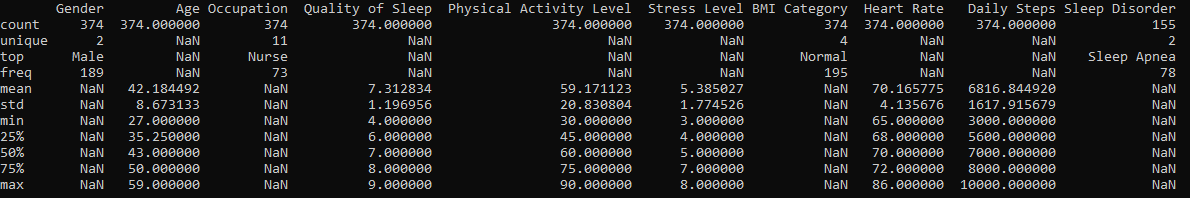

Выведем распределение качества сна и разбор по качеству сна и длительности сна

In [ ]:
sns.countplot(data=df, x="Quality of Sleep")
plt.title("Распределение качества сна")
plt.show()

print(df.groupby("Quality of Sleep")['Sleep Duration'].describe())

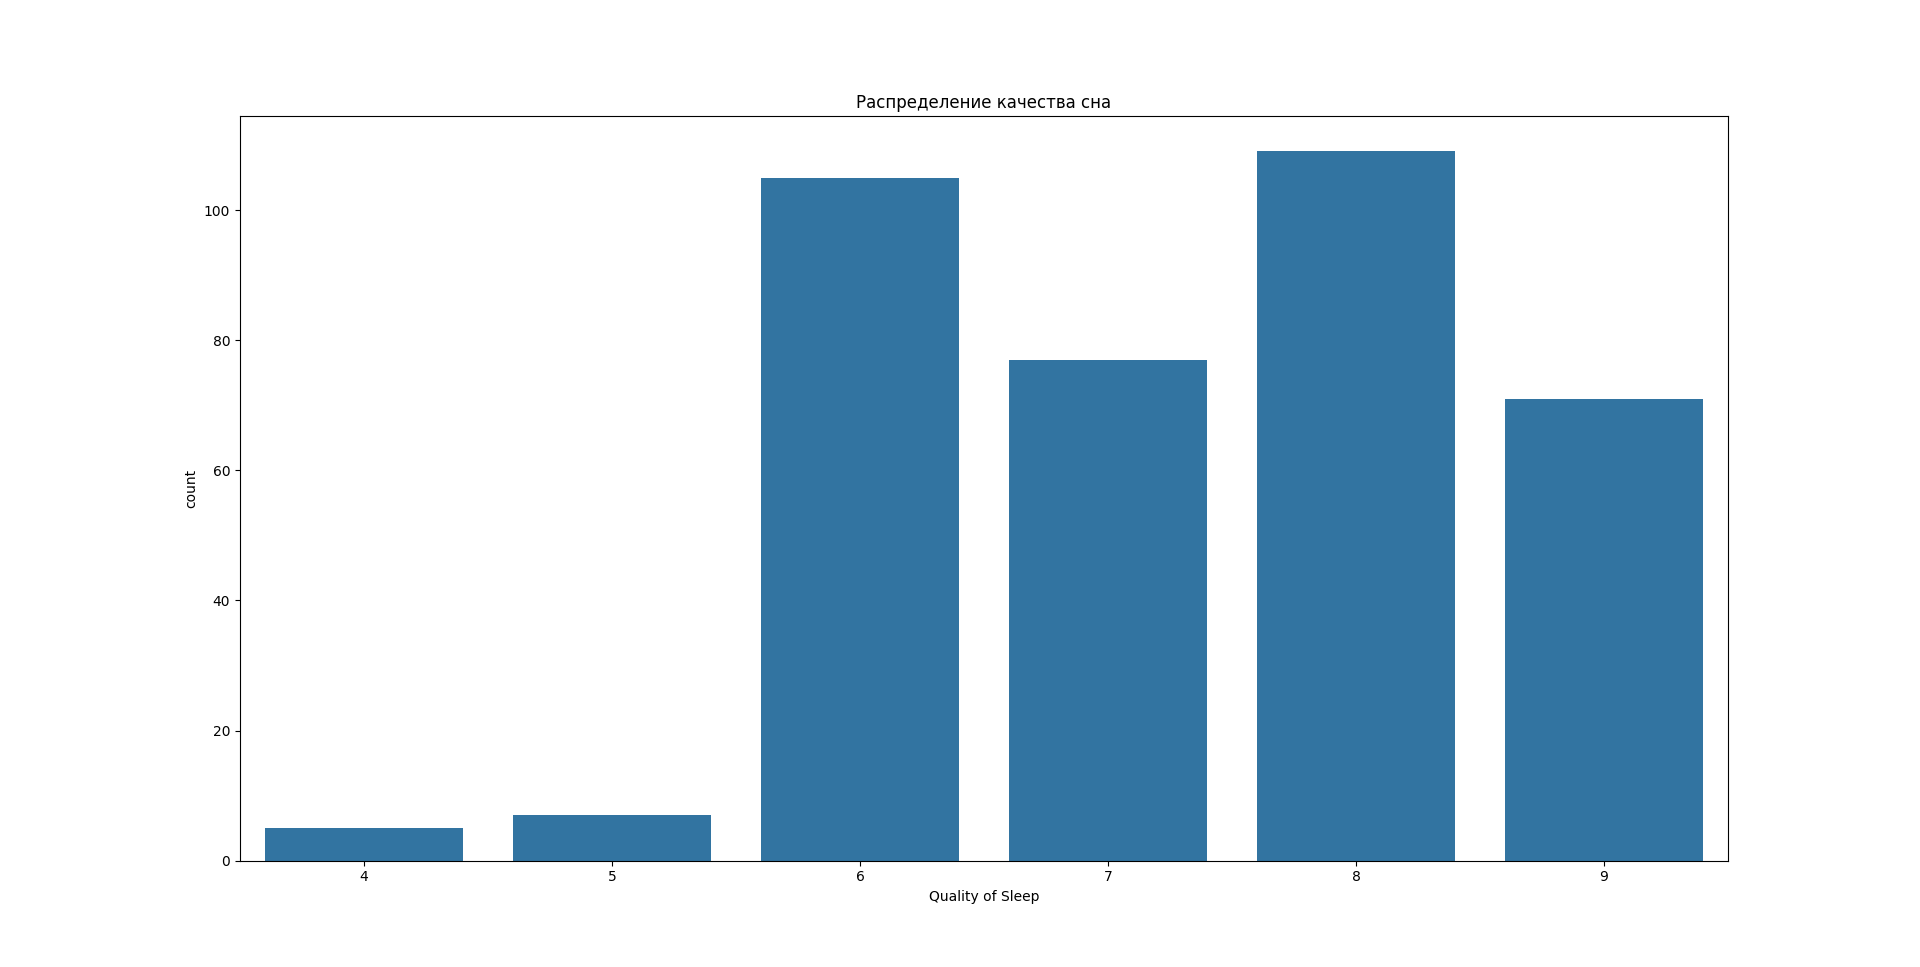

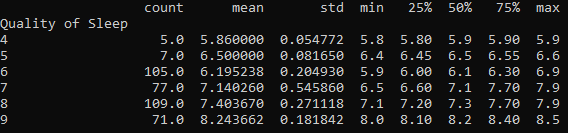

Больше всего людей с качеством сна 6,7,8. Датасет несбалансирован, преобладают средние и высокие значения.

При низком качестве сна (4-5) длительность сна равна 5-6 часов.
При среднем качестве сна (6-7) длительность сна уже выше: 6-7 часов.
При высоком качестве сна (8-9) ещё выше: 7-8 часов.

Чем выше качество сна, тем больше его длительность. Распределение сильно «сосредоточено» на значениях 6,7,8 , так что модель будет предсказывать их чаще.

Выведем boxplot с распредлением Sleep Duration по Quality of Sleep

In [ ]:
sns.boxplot(data=df, x="Quality of Sleep", y="Sleep Duration")
plt.title("Распределение Sleep Duration по Quality of Sleep")
plt.show()

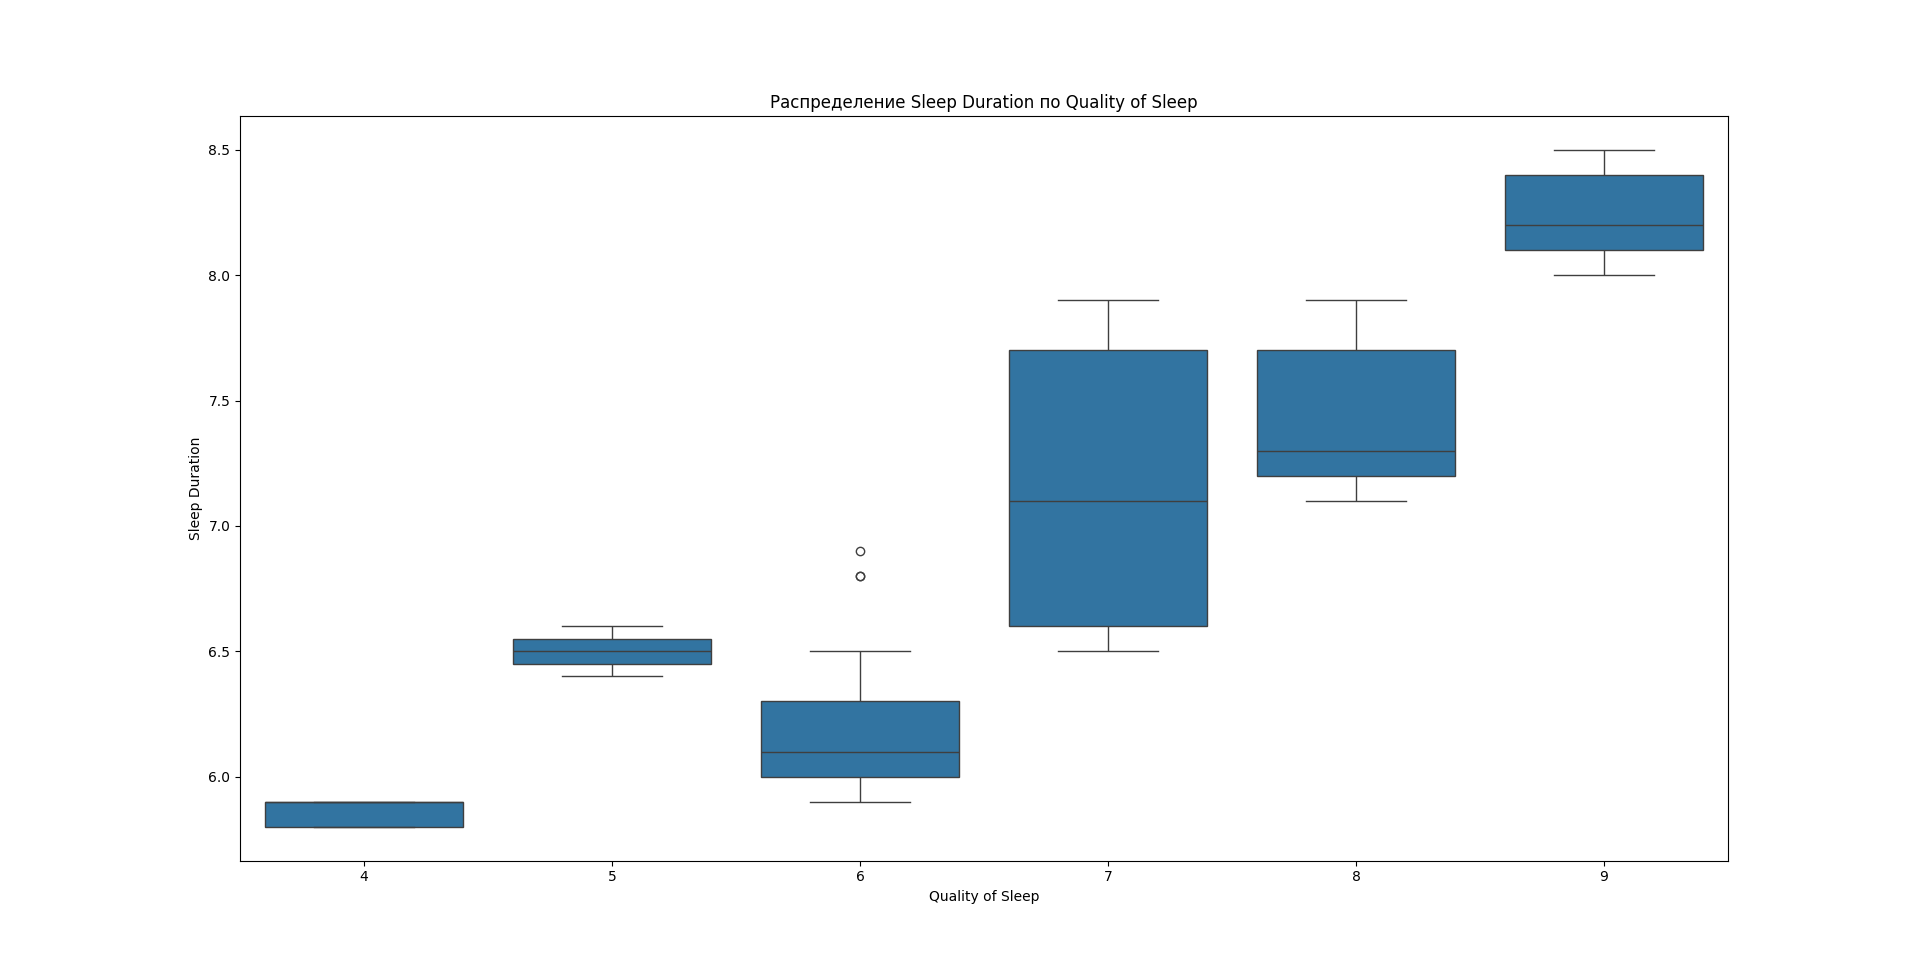

При очень низком качестве сна (4) медианная длительность сна в районе 5.5 часов, а при низком (5) в районе 6.5 часов.
При среднем качестве сна (6) длительность равна 6 часам.
При качестве выше среднего (7-8) длительность уже выше: 7-7.5 часов.
При высоком качестве сна (9) длительность ещё выше: 8 часов.

Видно, что распределение длительности сна сдвигается вверх при увеличении качества сна.

In [ ]:
sns.countplot(data=df, x="Stress Level")
plt.title("Распределение качества сна")
plt.show()

print(df.groupby("Stress Level")['Sleep Duration'].describe())

Выведем распределение уровня стресса и разбор по уровню стресса и длительности сна

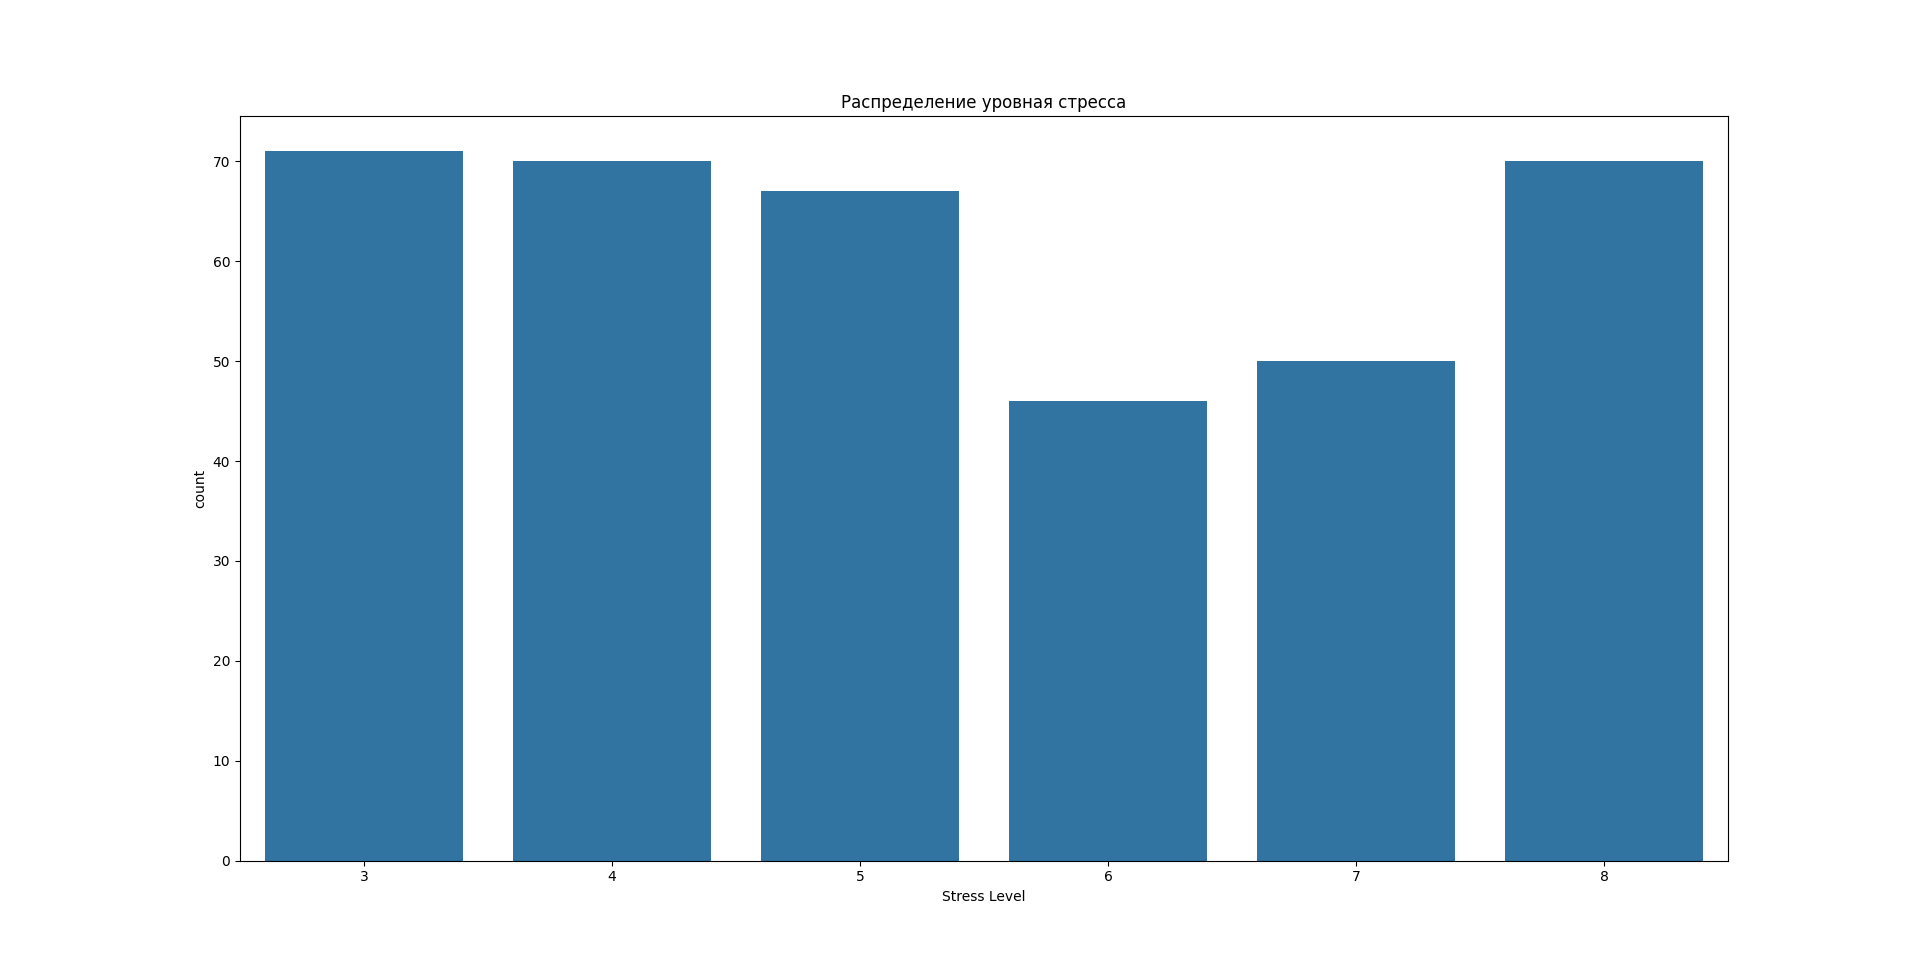

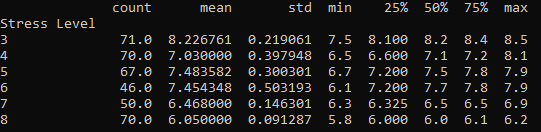

Датасет сбалансирован по уровню стресса, так как количество человек с разными уровнями стресса примерно одинаково.

С увеличением уровня стресса снижается среднее значение длительности сна, то есть чем выше стресс, тем ниже длительность сна.

Выведем корреляционную матрицу

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Корреляции числовых признаков")
plt.show()

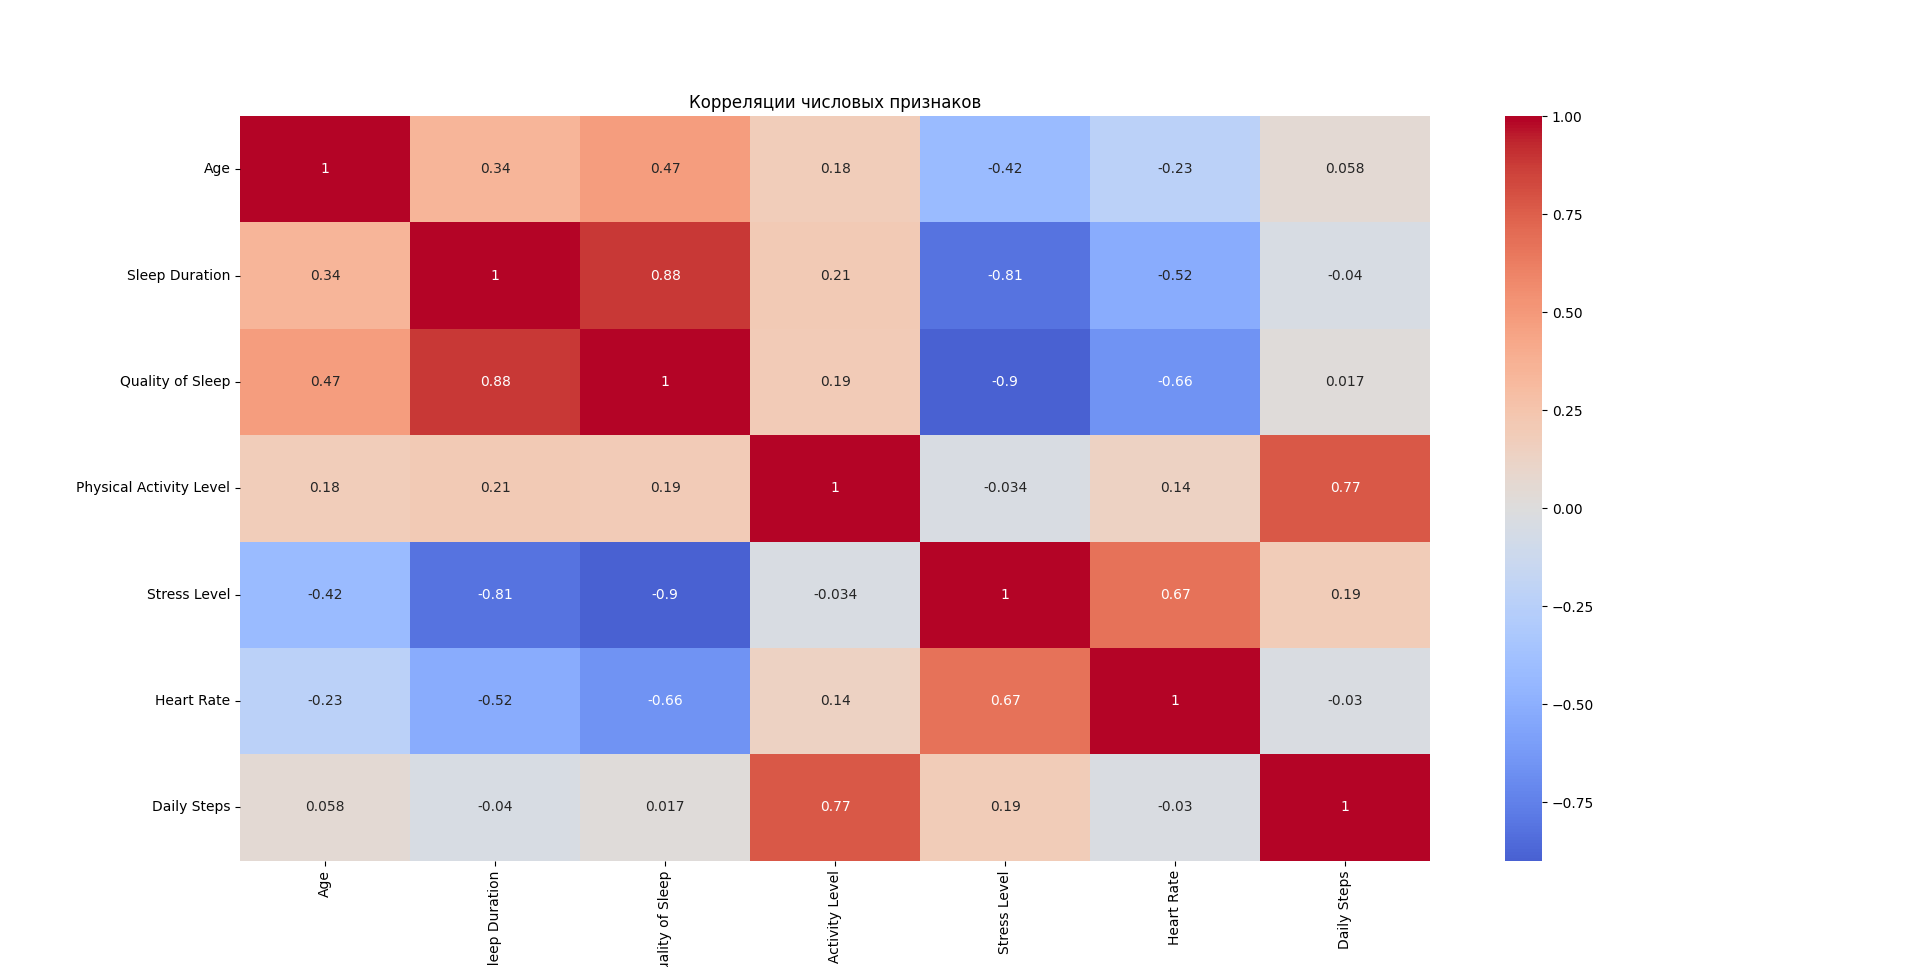

На Sleep Duration сильнее всего влияют Stress Level (-0.81) и Quality of Sleep (0.88).
Средняя связь: Heart Rate (-0.52).
Остальные признаки корреллируют мало.

In [ ]:
num_features = X_eda.select_dtypes(include="number").columns
n = len(num_features)

corrs = df[num_features].corrwith(y_eda)

cmap = plt.cm.get_cmap("coolwarm")

fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(10, n*3))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)

    sns.scatterplot(ax=axes[i], data=df1, x=col, y='Sleep Duration', color=color, alpha=0.6)
    axes[i].set_title(f"{col} (corr={corr:.2f})")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

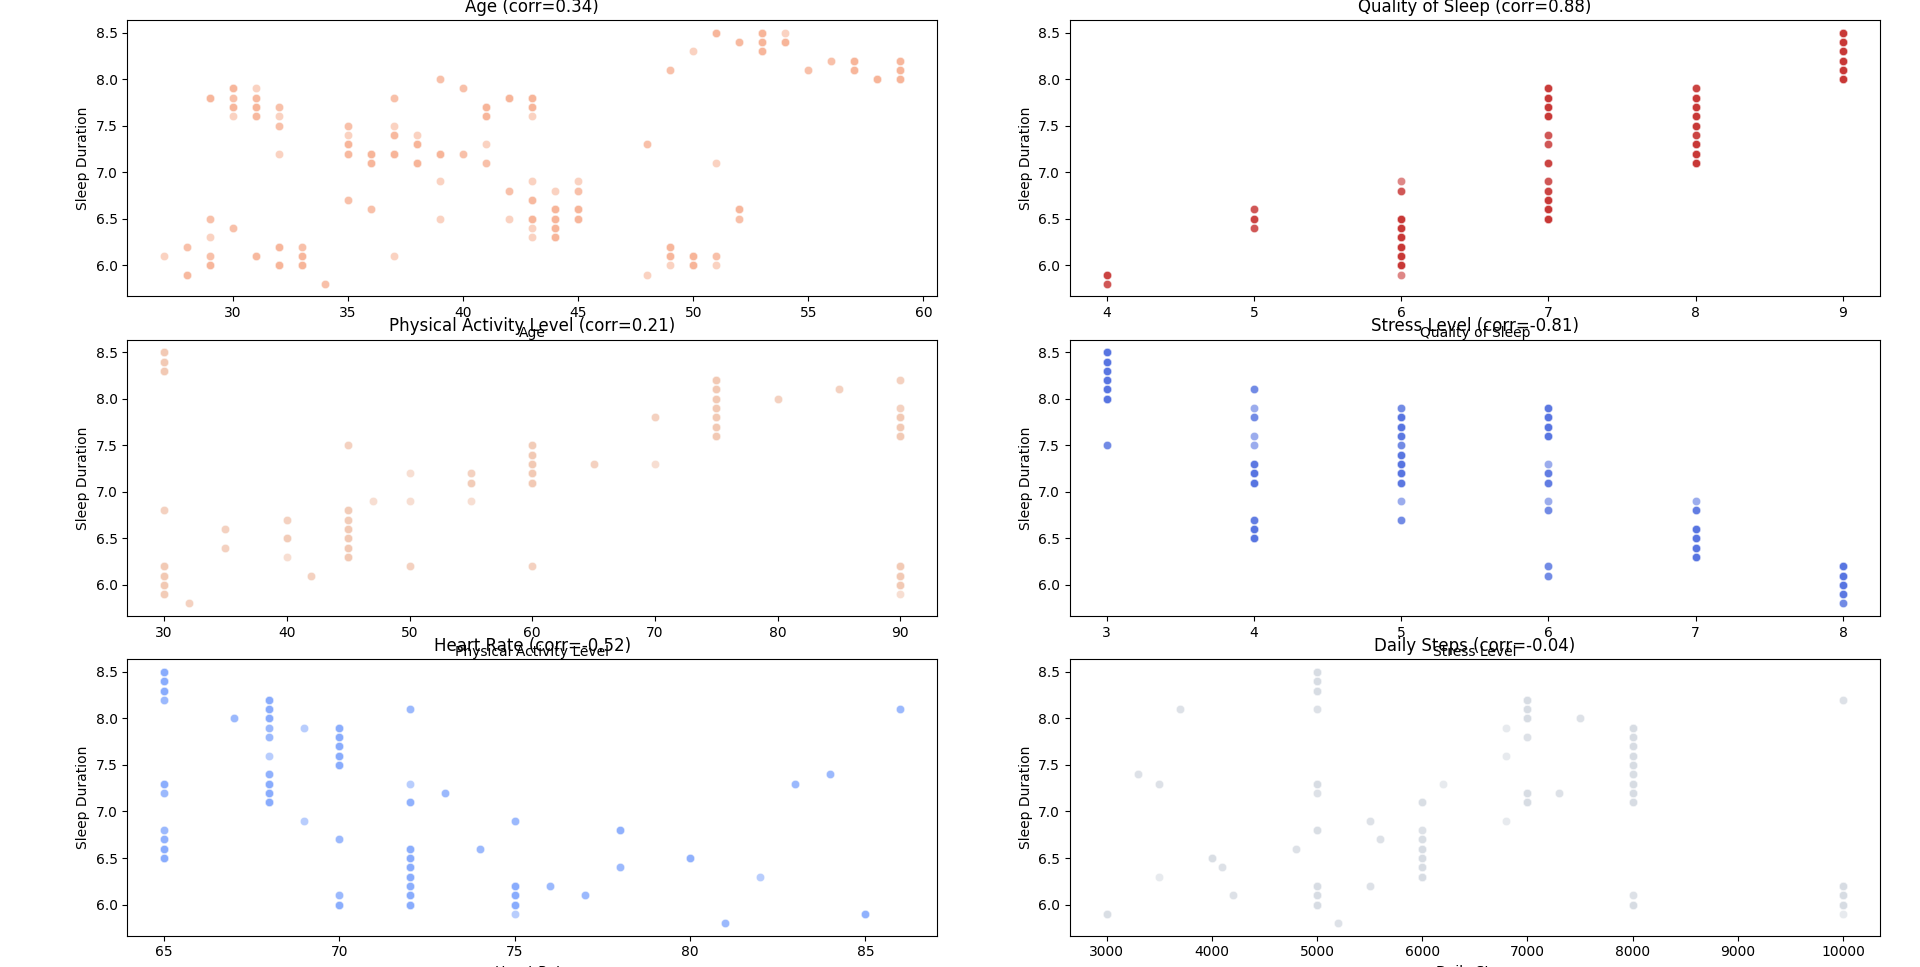

Отберём лучшие признаки

In [ ]:
from sklearn.preprocessing import StandardScaler

best_features = ['Stress Level', 'Quality of Sleep', 'Heart Rate']

X = df[best_features]
y = df[['Sleep Duration']]

X_scaled = StandardScaler().fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).head(n=3)

Разделим выборку на тестовую и обучающую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Создадим модель линейной регрессии и обучим её

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Выведем метрики качества

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

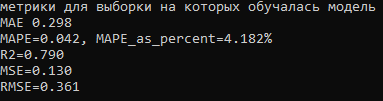

In [ ]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

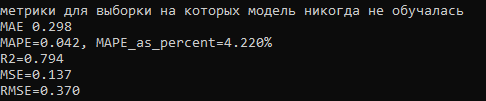